# # Day and Night Image Classifier

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

I am building a classifier that can accurately label these images as day or night, and I am using the **average brigthness** of the image as a feature to distinguish between 2 labels

# Importing imp Libraries

In [1]:
import cv2
import helpers

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

# Training and Testing DATA

**Loading the Datasets**

In [2]:
training_dir_image = "day_night_images/training/"
testing_dir_image = "day_night_images/test/"

In [3]:
IMAGE_LIST = helpers.load_dataset(training_dir_image)

**STANDARDIZED ALL THE IMAGES DATA**

In [4]:
STAND_DATA = helpers.standardize(IMAGE_LIST)

**VISUALIZE THE STANDARDIZED IMAGES DATA**

Shape: (600, 1100, 3)
Label [1:Day, 0:Night]: 1


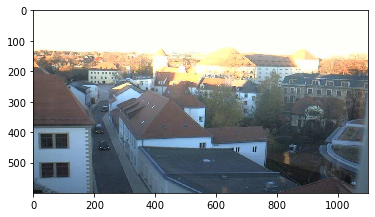

In [5]:
image_num = 0

selected_image = STAND_DATA[image_num][0]
selected_lable = STAND_DATA[image_num][1]

plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))

print("Label [1:Day, 0:Night]: "+str(selected_lable))

# Feature Extraction:
* For this problem, I am using the average brightness of the image as feature to classify the images in different labels.
* For this one I am converting the RGB image into the HSV and then calculating the total brightness of the image by summing the pixels value of the V channel (***AS V CHANNEL CONTRIBUTES LARGELY FOR BRIGHTNESS***)
* Then I will calculate the average brightness by dividing the total brightness with area of the image

In [6]:
def avg_brightness(rgb_image):
    
    #convert rgb into hsv
    
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    total_brightness = np.sum(hsv[:,:,2])
    area_image = 600*1100
    
    average_br = total_brightness/area_image
    
    return average_br
    

Testing the average brightness function

Average Brightness is: 25.715848484848486


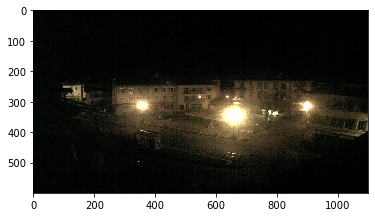

In [7]:
image_no = 190

image_test = STAND_DATA[image_no][0]

brightness = avg_brightness(image_test)
print("Average Brightness is: "+str(brightness))
plt.imshow(image_test)

# Building a Classifier

In [21]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    threshold = 100
    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label    
    

In [22]:
# def estimate_label(rgb_image):
    
#     avg_brg = avg_brightness(rgb_image)
    
#     # Now predicate the label
#     predicated_label = 0
    
#     if(avg_brg > 100):
#         predicated_label = 1
#     return predicated_label

# Testing the Classifier on the testing Dataset

* Below, we load in the test dataset, standardize it using the `standardize` function from helper file, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [23]:
TEST_IMAGE_LIST = helpers.load_dataset(testing_dir_image)

STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)

# Determine the accuracy of the classifier
Compare the output of your classification algorithm with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.


In [24]:
def get_misclassified_images(test_images):
    misclassified_images_labels = []

    for image in test_images:
        im = image[0]
        true_label = image[1]

        predicted_label = estimate_label(im)

        if(predicted_label != true_label):
            misclassified_images_labels.append((im, predicted_label, true_label))
    return misclassified_images_labels

In [25]:
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160
